In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib as plt


In [10]:
print('matplotlib version : ', mpl.__version__)

matplotlib version :  3.1.1


In [11]:
print(plt.style.available)

['seaborn-paper', 'grayscale', 'seaborn-bright', 'seaborn-dark', 'seaborn-ticks', 'Solarize_Light2', 'seaborn-whitegrid', 'bmh', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-notebook', 'dark_background', 'tableau-colorblind10', 'ggplot', 'seaborn-talk', '_classic_test', 'seaborn-darkgrid', 'seaborn-muted', 'seaborn-pastel', 'seaborn-colorblind', 'fast', 'seaborn', 'seaborn-deep', 'classic', 'seaborn-poster', 'fivethirtyeight']


In [12]:
mpl.style.use(['ggplot'])

In [13]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.drop(['AREA','REG','DEV','Type','DevName'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'Coverage':'Nativity'}, inplace=True)
df['Total'] = df.sum(axis=1)
df.set_index('Country', inplace=True)
df.columns = list(map(str, df.columns))
years = list(map(str, range(1980, 2014)))

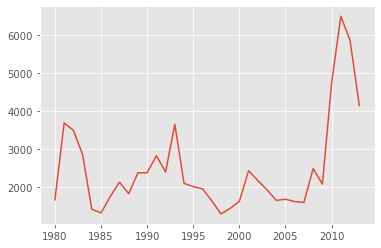

In [14]:
haiti = df.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.plot()

In [15]:
df.loc['Haiti', years]

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

TypeError: 'module' object is not callable

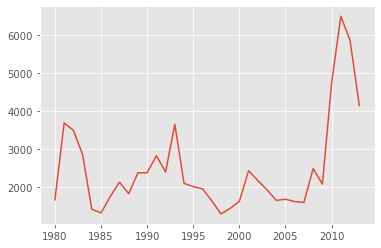

In [16]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.text(2000, 6000, '2010 Earthquake') # see note below

# plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

In [17]:
df_CI=df.loc[['India','China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


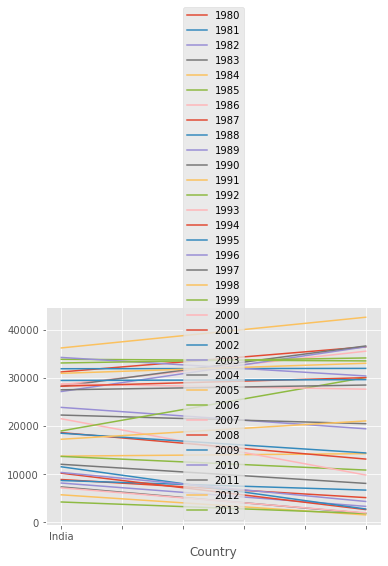

In [19]:
df_CI.plot(kind='line')

In [20]:
df_CI=df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


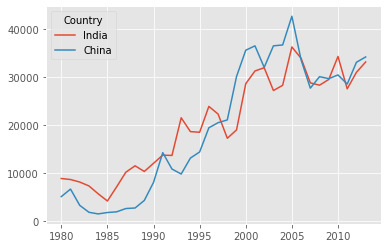

In [21]:
df_CI.plot(kind='line')

In [22]:
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

AttributeError: module 'matplotlib' has no attribute 'title'

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

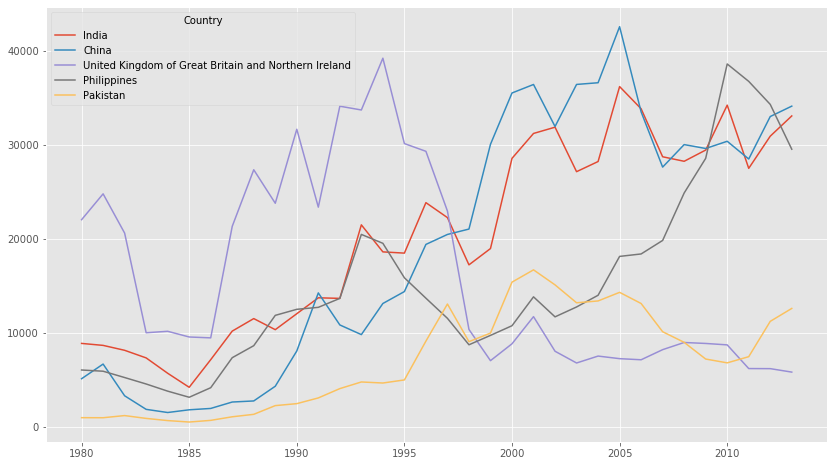

In [25]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose() 
print(df_top5)
# Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size